In [1]:
# Random Forest with Gradient Boosting Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\gb_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,damage_grade
247768,15,427,2,25,r,n,f,q,0,1,0,0,1
155978,26,886,2,20,w,n,v,x,0,0,0,0,1
197284,8,463,1,0,i,x,v,j,0,0,0,0,1
89399,13,1212,2,10,r,n,f,q,0,1,0,0,1
128702,26,1023,2,5,r,n,v,q,0,0,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])

In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,damage_grade
247768,15,427,2,25,2,0,0,1,0,1,0,0,1
155978,26,886,2,20,4,0,2,3,0,0,0,0,1
197284,8,463,1,0,1,2,2,0,0,0,0,0,1
89399,13,1212,2,10,2,0,0,1,0,1,0,0,1
128702,26,1023,2,5,2,0,2,1,0,0,0,0,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,12].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.76      0.81      0.78      5045
           2       0.55      0.52      0.53      5051
           3       0.68      0.68      0.68      4979

    accuracy                           0.67     15075
   macro avg       0.66      0.67      0.67     15075
weighted avg       0.66      0.67      0.67     15075



In [17]:
#Model based Feature Selection

from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(classifier, threshold='median')
fs.fit(X_train,y_train)
fs_features = fs.transform(X_train)

In [18]:
# Print the indices of the selected features
print(fs.get_support(indices=True))

[0 1 3 4 5 9]


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


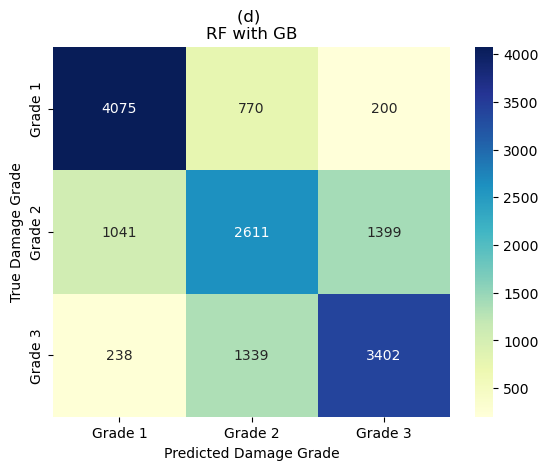

In [24]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
# plt.title("RF Prediction Matrix")
plt.title("(d) \nRF with GB")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()

In [21]:
from sklearn.tree import export_text

In [22]:
features_data = train_data.drop(columns=['damage_grade'], axis=1)

In [23]:
# # Print out the decision trees in the random forest
# for i, tree in enumerate(classifier.estimators_):
#     r = export_text(tree, feature_names=features_data.columns.tolist())
#     print(f"Decision Tree {i}:\n{r}")

# tree = classifier.estimators_[0]
# r = export_text(tree, feature_names=features_data.columns.tolist())
# print(f"Decision Tree {0}:\n{r}")